<a href="https://colab.research.google.com/github/Zolinad/Topic_Redes_Neurais/blob/main/v8_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('/content/v8_admission_dataset.csv')

In [3]:
# Divisão do dataset em treino e teste
y = df['Chance of Admit ']
x = df.drop('Chance of Admit ', axis = 1)
x_treino, x_teste = x[0:300], x[300:]
y_treino, y_teste = y[0:300], y[300:]

In [4]:
# Quantidade de entradas
q_entradas = x_treino.shape[1]

In [5]:
from keras.models import Sequential
from keras.layers import Dense

# Criar a arquitetura da rede neural:
modelo = Sequential()
modelo.add(Dense(units=4, activation='relu', input_dim = q_entradas))
modelo.add(Dense(units=4, activation='relu'))
modelo.add(Dense(units=1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Treinar o modelo
modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
resultado = modelo.fit(x_treino, y_treino, epochs=75,
                       batch_size=40, validation_data=(x_teste, y_teste))

Epoch 1/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 15858.6836 - mae: 125.7731 - val_loss: 13543.1729 - val_mae: 116.2915
Epoch 2/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12709.4600 - mae: 112.5930 - val_loss: 10678.4414 - val_mae: 103.2623
Epoch 3/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10027.6797 - mae: 99.9987 - val_loss: 8274.3633 - val_mae: 90.8980
Epoch 4/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7693.3643 - mae: 87.5987 - val_loss: 6309.5293 - val_mae: 79.3749
Epoch 5/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5867.3486 - mae: 76.4840 - val_loss: 4735.4014 - val_mae: 68.7636
Epoch 6/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4376.4897 - mae: 66.0550 - val_loss: 3497.8450 - val_mae: 59.0980
Epoch 7/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3239.4883 - mae: 56.8228 - val_loss: 2537.2290 - val_mae: 50.3315
Epoch 8/75
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2330.5640 - mae: 48.1965 - val_loss: 1807.1205 - val_mae: 42.4747
Epoch 9/75
8/

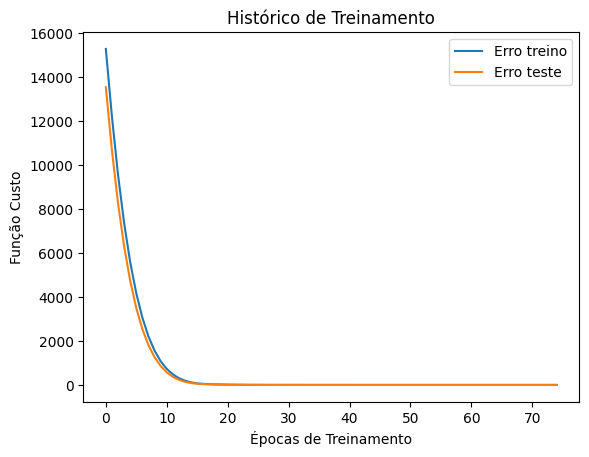

In [7]:
# Plotando o gráfico do histórico de treinamento
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função Custo')
plt.xlabel('Épocas de Treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()